In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "Resources/listings.csv"

df = pd.read_csv(file)
columns_to_keep = ["zipcode", "room_type", "accommodates", "bedrooms", "bathrooms", "beds", "minimum_nights", "number_of_reviews", "price"]
df = df[columns_to_keep]

#drop all rows with nulls
df.dropna(how='any', inplace=True)

#make copy of df to avoid warning errors
data_df = df.copy()

# price is a string.  Remove $ and convert into float
# https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
data_df["price"] = data_df["price"].replace('[\$,]', '', regex=True).astype(float)

#there is one row where they have "CA" for zipcode.  Drop that row.
data_df=data_df[data_df.zipcode != "CA"]

#drop hotel room from room_type
data_df=data_df[data_df.room_type != "Hotel room"]

#some zipcodes start with CA.  replace "CA " with "" 
#https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
data_df["zipcode"] = data_df["zipcode"].replace('CA ', '', regex=True)

#drop all rows with nulls
data_df.dropna(how='any', inplace=True)

#convert zipcodes to intergers 
data_df["zipcode"] = data_df["zipcode"].astype(str).astype(int)

#we only want to keep prices below $500.  Everything about $500 is an outlier
data_df = data_df[data_df.price < 500]

data_df.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,price
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240,170.0
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111,235.0
2,94117,Private room,2,1.0,4.0,1.0,32,19,65.0
3,94117,Private room,2,1.0,4.0,1.0,32,8,65.0
5,94110,Private room,3,1.0,1.0,1.0,1,736,139.0


In [31]:
data_df.dtypes

zipcode                 int64
room_type              object
accommodates            int64
bedrooms              float64
bathrooms             float64
beds                  float64
minimum_nights          int64
number_of_reviews       int64
price                 float64
price_bin            category
dtype: object

In [32]:
# Non-uniformed data bins
data_df["price_bin"]= pd.cut(data_df['price'], bins=[0, 85, 122, 165, 235, 500],labels=["bin 0-85","bin 86 -122","bin 123-165","bin 166-235","bin 236-500"],include_lowest=True)
data_df

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,price,price_bin
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240,170.0,bin 166-235
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111,235.0,bin 166-235
2,94117,Private room,2,1.0,4.0,1.0,32,19,65.0,bin 0-85
3,94117,Private room,2,1.0,4.0,1.0,32,8,65.0,bin 0-85
5,94110,Private room,3,1.0,1.0,1.0,1,736,139.0,bin 123-165
...,...,...,...,...,...,...,...,...,...,...
8133,94117,Entire home/apt,3,0.0,1.0,2.0,30,0,112.0,bin 86 -122
8134,94116,Entire home/apt,10,4.0,3.5,10.0,30,0,269.0,bin 236-500
8135,94103,Entire home/apt,6,3.0,2.5,4.0,30,0,375.0,bin 236-500
8136,94109,Private room,2,1.0,1.0,1.0,30,0,86.0,bin 86 -122


In [28]:
data_df.shape

(7505, 10)

In [29]:
data_df.to_csv("Output/cleaned_data_5_bin.csv", index = False)

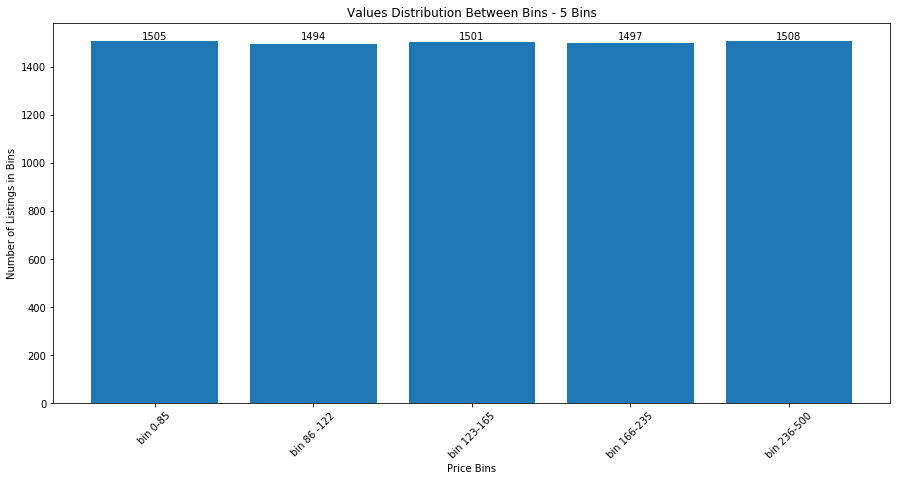

In [109]:
price_bins = data_df.sort_values('price').drop_duplicates('price_bin')['price_bin'].values
bin_cnt = data_df[['price_bin']].groupby('price_bin').size()
bin_counts = [bin_cnt.loc[bin_name] for bin_name in price_bins]

plt.figure(figsize=(15, 7))
plt.bar(x=price_bins, height=bin_counts)
plt.xticks(rotation=45)

for index, value in enumerate(price_bins):
    plt.text(value, bin_counts[0], str(bin_counts[index]),ha='center', va='bottom')
#Labeling lims
plt.ylabel("Number of Listings in Bins")
plt.xlabel("Price Bins")
#Adding a title
plt.title("Values Distribution Between Bins - 5 Bins")

plt.savefig("Graphs/Val_distribution_5b.png")

In [106]:
bin_counts

[1505, 1494, 1501, 1497, 1508]